# k-최근접 이웃의 한계

앞서 제작한 k-최근접 이웃 회귀를 이용한 모델로 아주 거대한 50cm의 농어의 무게를 예측해보니 저울에 나온 농어의 무게와 너무 차이가 나는 것을 확인하였다. **문제점을 파악하보자.**

In [1]:
import numpy as np

perch_length = np.array([ 8.4, 13.7, 15.,  16.2, 17.4, 18.,  18.7, 19.,  19.6, 20.,  21.,  21.,  21.,  21.3,
 22.,  22.,  22.,  22.,  22.,  22.5, 22.5, 22.7, 23.,  23.5, 24.,  24.,  24.6, 25.,
 25.6, 26.5, 27.3, 27.5, 27.5, 27.5, 28.,  28.7, 30.,  32.8, 34.5, 35.,  36.5, 36.,
 37.,  37.,  39.,  39.,  39.,  40.,  40.,  40.,  40.,  42.,  43.,  43.,  43.5, 44. ])


perch_weight = np.array([ 5.9,   32.,    40.,    51.5,   70.,   100.,    78.,    80.,    85.,    85.,
  110.,   115.,   125.,   130.,   120.,   120.,   130.,   135.,   110. ,  130.,
  150.,   145.,   150.,   170.,   225.,   145.,   188.,   180.,   197.,   218.,
  300.,   260. ,  265. ,  250.,   250.,   300.,   320.,   514.,   556.,   840.,
  685.,   700.,   700.,   690.,   900.,   650.,   820.,   850.,   900. , 1015.,
  820.,  1100. , 1000. , 1100.,  1000.,  1000. ])

이번에도 데이터를 훈련 세트와 테스트 세트로 나눈다. 특성 데이터는 2차원 배열로 변환한다.

In [2]:
from sklearn.model_selection import train_test_split

#훈련 세트와 테스트 세트로 나눈다.
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)

#2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input.shape, test_input.shape)

(42,) (14,) (42,) (14,)
(42, 1) (14, 1)


최근접 이웃 개수를 3으로 하는 모델을 훈련한 후 길이가 50cm인 농어의 무게를 예측해보자.

In [3]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.n_neighbors = 3

knr.fit(train_input, train_target)

print(knr.predict([[50]]))


[1033.33333333]


본 모델에서는 50cm 농어의 무게를 약 1033g 정도로 예측하는 모습이다. 하지만 이 값은 오차가 크다고 한다. 산점도를 그려 여러 길이의 농어에 대해 예측값을 정확히 파악해보자

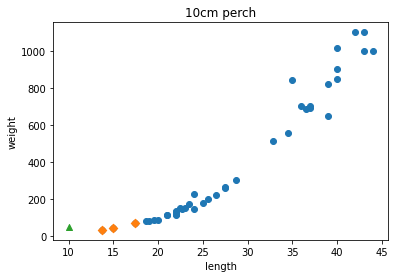

47.333333333333336


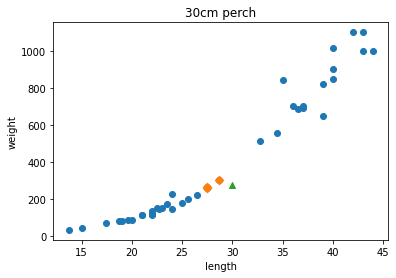

275.0


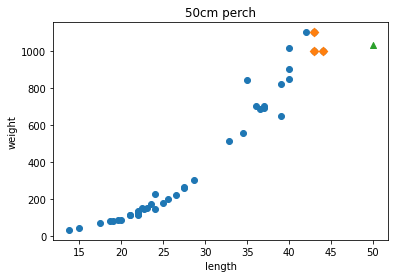

1033.3333333333333


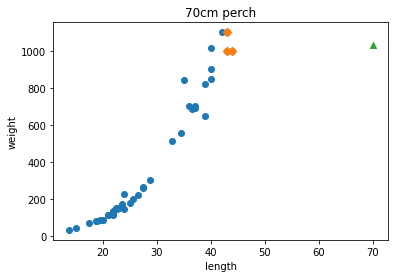

1033.3333333333333


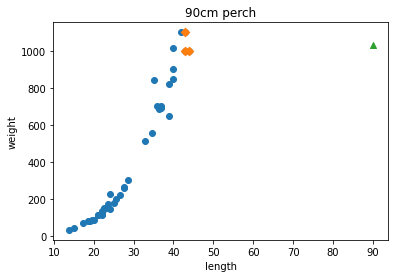

1033.3333333333333


In [4]:
import matplotlib.pyplot as plt

#50cm 농어의 이웃을 구한다(distance는 이웃과의 거리 배열, idx는 이웃 샘플의 인덱스 배열)
for n in range(10, 101, 20):
  distance, idx = knr.kneighbors([[n]])
  prediction = knr.predict([[n]])

  plt.scatter(train_input, train_target)
  plt.scatter(train_input[idx], train_target[idx], marker='D')

  plt.scatter(n, prediction, marker='^')
  plt.title(f"{n}cm perch")
  plt.xlabel("length")
  plt.ylabel("weight")
  plt.show()

  print(np.mean(train_target[idx]))

위 그래프에서 확인해 볼 수 있듯이 50cm 농어뿐만 아니라 약 45cm를 벗어난 길이의 농어의 경우는 모두 k-최근접 이웃 샘플이 45cm근방의 샘플들로만 이루어져서 모두 예측 무게가 1033.33g으로 엉뚱하게 예측되고 있다.

**이런 식이면 농어가 아무리 커도 예측 무게가 더 늘어나지 않을 것이다!**

그렇다면 이러한 문제를 손쉽게 해결할 수 있는 다른 알고리즘을 활용해서 본 문제를 해결해보자.

# **선형 회귀**
선형 회귀(linear regression)는 널리 사용되는 대표적인 회귀 알고리즘이다. 비굦거 간단하고 성능이 뛰어나기 때문에 맨 처음 배우는 머신러닝 알고리즘 중 하나이다. 

선형이라는 말에서 짐작할 수 있듯이 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘이다. 이때 말하는 직선은 데이터의 특성을 가장 잘 나타낼 수 있는 직선이다.

### **사이킷런은 sklearn.linear_model 패키지 아래에 LinearRegression 클래스로 선형 회귀 알고리즘을 구현해놓았다.**

이 클래스의 객체를 만들어 훈련할 것이며, 앞으로 계속 보게 되겠지만 사이킷런의 모델 클래스들은 훈련, 평가, 예측하는 메서드 이름이 모두 동일하다.

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 선형 회귀 모델을 훈련
lr.fit(train_input, train_target)

#50cm 농어에 대해 무게 예측
print(lr.predict([[50]]))

#가중치와 절편 출력
print(lr.coef_, lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477


k-최근접 이웃 회귀를 사용했을 때와 달리 선형 회귀는 50cm 농어의 무게를 아주 높게 예측했다! 이 선형 회귀가 학습한 직선을 그려 보고 어떻게 이런 값이 나왔는지 알아보자.

하나의 직선을 그리려면 기울기 a 와 절편 b 가 있어야 한다. y = a*x + b 처럼 쓸 수 있듯이 말이다. 즉 선형 회귀 알고리즘은 이런 a, b 값을 찾아주며 LinearRegression 클래스가 찾은 기울기와 절편 값은 lr 객체의 coef_와 intercept_ 속성에 저장되어 있다.

**이 값을 이용해 농어의 길이 15에서 50까지 직선으로 그려보자.**

+ coef_ 속성 이름에서 알 수 있듯이 머신러닝에서 기울기를 종종 계수(coefficient) 또는 가중치(weight)라고 부른다.

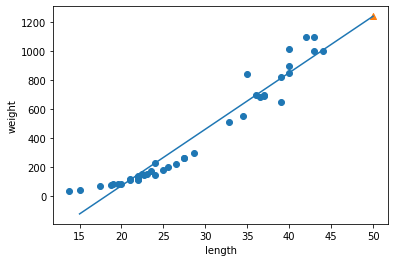

In [6]:
a = lr.coef_
b = lr.intercept_

plt.scatter(train_input, train_target)
plt.plot([15,50], [15*a+b, 50*a+b])

plt.scatter(50, 1241, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

바로 이 직선이 선형 회귀 알고리즘이 이 데이터셋에서 찾은 최적의 직선이다. 길이가 50cm인 농어에 대한 예측은 이 직선의 연장선에 있음을 보인다.

결과적으로 성공이다! 이제 훈련 세트 범위를 벗어난 농어의 무게도 예측할 수 있을 것이다. 

그럼 이전 절과 같이 훈련 세트와 테스트 세트에 대한 결정계수 점수를 확인해보자

In [7]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976039
0.8247503123313558


훈련 세트와 테스트 세트의 점수가 조금 차이나는 것을 확인할 수 있다. 그럼 이 모델이 훈련 세트에 과대적합되었다고 말할 수 있을까? 사실 훈련 세트의 점수도 이전 k-최근접 이웃 회귀에 비해 낮음을 알 수 있다. 

즉, 오히려 **전체적으로 과소적합되었다고 볼 수 있다는 것이다.** 또한 과소적합 말고도 다른 문제가 존재한다. 그래프 왼쪽 아래를 보면 선형 회귀로 만든 직선이 왼쪽 아래로 쭉 뻗어 있다. 이 직선대로 예측하면 농어의 무게가 0g 이하로 내려갈 텐데 현실에서는 있을 수가 없는 값이다!

# **다항 회귀**
그렇다면 단순하게 생각해보자. 농어의 길이와 무게에 대한 산점도를 자세히 보면 일직선이라기보다 왼쪽 위로 조금 구부러진 곡선에 가깝다. 즉, 최적의 직선을 찾기보다 최적의 곡선을 찾으면 더 나은 결과를 도출할 수 있을 것이다!

1차 방정식이 아닌 2차 방정식의 그래프를 활용해보자. 2차 방정식의 그래프를 그리려면 길이를 제곱한 항이 훈련 세트에 추가되어야한다. 사실 넘파이를 사용하면 아주 간단히 만들 수 있다. 2창에서 사용했던 column_stack() 함수를 사용하면 아주 간단하다.

In [8]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


원래 특성인 길이를 제곱하여 왼쪽 열에 추가했기 때문에 훈련 세트와 테스트 세트 모두 열이 2개로 늘어났다.

이제 train_poly를 사용해 선형 회귀 모델을 다시 훈련해보자. 이 모델이 2차 방정식의 a,b,c를 잘 찾을 것으로 기대해보자.

여기서 주목할 점은 2차 방정식 그래프를 찾기 위해 훈련 세트에 제곱 항을 추가했지만, 타깃값은 그대로 사용한다는 것이다. **목표하는 값은 어떤 그래프를 훈련하든지 바꿀 필요가 없다!!**

앞서 훈련 세트에서 했던 것처럼 테스트할 때에는 이 모델에 농어 길이의 제곱과 원래 길이를 함께 넣어 주어야 한다.

In [9]:
lr = LinearRegression()

lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278276


1절에서 훈련한 모델보다 더 높은 값을 예측했음을 알 수 있었고, 2차 방정식 중 가장 해당 모델에 적합한 그래프를 구해냈음을 알 수 있다.

이렇게 구한 방정식을 **다항식(polynomial)**이라 부르며 다항식을 사용한 선형 회귀를 **다항 회귀(polynomial regression)**라 부른다.

그럼 이 2차 방정식의 계수와 절편 a, b, c를 알았으니 이전과 동일하게 훈련 세트의 산점도에 그래프로 그려 보자. 

짧은 직선을 이어서 그리면 마치 곡선처럼 표현할 수 있기에 여기에서는 1씩 짧게 끊어서 그려보겠다.

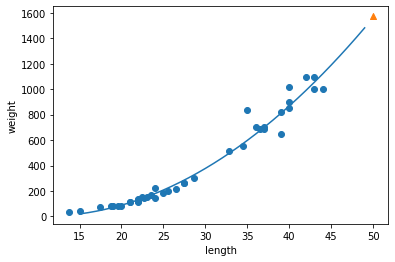

0.9706807451768623
0.9775935108325122


In [12]:
#구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만든다.
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

#다항 회귀로 구한 2차 방정식 그리기
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

plt.scatter(50, 1574, marker="^")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

#훈련 세트와 테스트 세트의 결정계수 출력
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

훈련세트와 테스트 세트에 대한 점수가 크게 높아졌다! 

하지만 여전히 테스트 세트의 점수가 조금 더 높게 나타난다. 즉, 과소적합이 아직 남아 있는 것 같다. 그럼 조금 더 복잡한 모델이 필요할 것 같다.